# Projeto Machine Learning 2 - Decision Tree

In [1]:
#Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Carregando dataset
df=pd.read_parquet('spotify_songs.parquet')

In [3]:
df.head()

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32833 entries, 6f807x0ima9a1j3VPbc7VN to 29zWqhca3zt5NsckZqDf6c
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                32828 non-null  object 
 1   track_artist              32828 non-null  object 
 2   track_popularity          32833 non-null  int64  
 3   track_album_id            32833 non-null  object 
 4   track_album_name          32828 non-null  object 
 5   track_album_release_date  32833 non-null  object 
 6   playlist_name             32833 non-null  object 
 7   playlist_id               32833 non-null  object 
 8   playlist_genre            32833 non-null  object 
 9   playlist_subgenre         32833 non-null  object 
 10  danceability              32833 non-null  float64
 11  energy                    32833 non-null  float64
 12  key                       32833 non-null  int64  
 13  loudness                  32

## Limpeza do dataset

Foram removidas as colunas `track_album_id` ,`track_album_name`,`track_album_release_date`,`playlist_name` e `playlist_id`.

In [5]:
#removendo colunas 
df = df.drop(columns=['track_album_id','track_album_name','track_album_release_date','playlist_name','playlist_id'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32833 entries, 6f807x0ima9a1j3VPbc7VN to 29zWqhca3zt5NsckZqDf6c
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         32828 non-null  object 
 1   track_artist       32828 non-null  object 
 2   track_popularity   32833 non-null  int64  
 3   playlist_genre     32833 non-null  object 
 4   playlist_subgenre  32833 non-null  object 
 5   danceability       32833 non-null  float64
 6   energy             32833 non-null  float64
 7   key                32833 non-null  int64  
 8   loudness           32833 non-null  float64
 9   mode               32833 non-null  int64  
 10  speechiness        32833 non-null  float64
 11  acousticness       32833 non-null  float64
 12  instrumentalness   32833 non-null  float64
 13  liveness           32833 non-null  float64
 14  valence            32833 non-null  float64
 15  tempo              32833 non-null  fl

Vamos avaliar os possível valores nulos do dataset.

In [7]:
df.isnull().sum()

track_name           5
track_artist         5
track_popularity     0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

In [8]:
df[df['track_name'].isnull()][['track_name','track_artist','track_popularity']]

,track_name,track_artist,track_popularity
track_id,,,
69gRFGOWY9OMpFJgFol1u0,None,None,0
5cjecvX0CmC9gK0Laf5EMQ,None,None,0
5TTzhRSWQS4Yu8xTgAuq6D,None,None,0
3VKFip3OdAvv4OfNTgFWeQ,None,None,0
69gRFGOWY9OMpFJgFol1u0,None,None,0


Verificamos que apenas 5 entradas não tem nome da música ou do artista. Essas 5 faixar também estão com a popularidade zerada. 
Vamos remover essas 5 entradas do dataset

In [9]:
df = df.dropna(subset=['track_name'])

In [10]:
df.isnull().sum()

track_name           0
track_artist         0
track_popularity     0
playlist_genre       0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
dtype: int64

# Transformando variáveis catégoricas em dummy
Como modelo a ser utilizado (árvore de decisão) aceita apenas variaveis numéricas, vamos transformar as colunas `playlist_genre` e `playlist_subgenre` em dummies.

In [11]:
# Usando get_dummies para converter as variável categórica em colunas indicadoras
df = pd.get_dummies(df, columns=['playlist_genre','playlist_subgenre','key','mode'], prefix=['genre', 'subgenre','key','mode'])

In [12]:
df.head()

,track_name,track_artist,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_0,mode_1
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,...,False,False,True,False,False,False,False,False,False,True
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,...,False,False,False,False,False,False,False,True,False,True
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,...,False,False,False,False,False,False,False,False,True,False
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,...,False,False,False,True,False,False,False,False,False,True
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,...,False,False,False,False,False,False,False,False,False,True


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 6f807x0ima9a1j3VPbc7VN to 29zWqhca3zt5NsckZqDf6c
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   track_name                          32828 non-null  object 
 1   track_artist                        32828 non-null  object 
 2   track_popularity                    32828 non-null  int64  
 3   danceability                        32828 non-null  float64
 4   energy                              32828 non-null  float64
 5   loudness                            32828 non-null  float64
 6   speechiness                         32828 non-null  float64
 7   acousticness                        32828 non-null  float64
 8   instrumentalness                    32828 non-null  float64
 9   liveness                            32828 non-null  float64
 10  valence                             32828 non-null  float64
 11  tempo   

# Análise Exploratória

# Estabelecendo X,y

In [14]:
X = df.drop(columns=['track_name','track_artist','track_popularity'])
y = df['track_popularity']

# Treinando Regressor por arvore de decisão

In [15]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando um regressor AdaBoost com árvores de decisão como modelos fracos
base_regressor = DecisionTreeRegressor(max_depth=40)  # Árvore de decisão fraca
adaboost_regressor = AdaBoostRegressor(base_regressor, n_estimators=50, learning_rate=0.01, random_state=42)

# Treine o modelo
adaboost_regressor.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = adaboost_regressor.predict(X_test)

# Avalie o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprima as métricas de avaliação
print(f'Erro Quadrático Médio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

Erro Quadrático Médio (MSE): 512.25
Coeficiente de Determinação (R²): 0.18


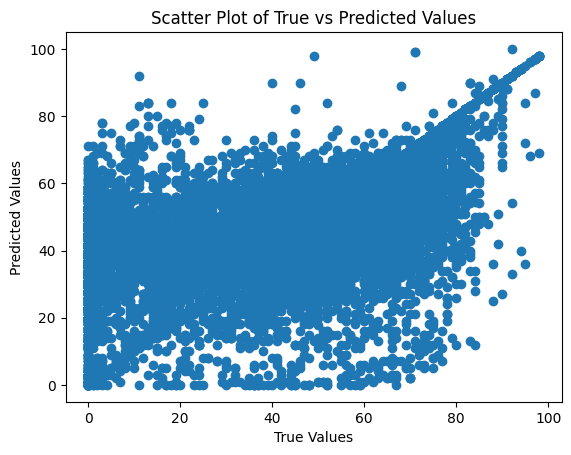

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values')
plt.show()